In [1]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
Data_Dir_HR = 'HR_Data'
Data_Dir_Nginx = 'Baseline_Data'
Data_Dir = Data_Dir_Nginx
#traffic = 'TC-VM-01'
Perfomance_File = os.path.join(Data_Dir, 'nginx_metrics.csv')


if os.path.exists(Perfomance_File):
    df_baselines = pd.read_csv(Perfomance_File)
    print("Loaded performance metrics:")
    display(df_baselines)
    print(df_baselines.shape)
else:
    print(f"Performance file not found at {Perfomance_File}. Please verify path.")
    df_baselines = pd.DataFrame()

Loaded performance metrics:


,Test_ID,Replicas,Interference_Name,Interference_ID,Given_RPS,Throughput,Avg_Latency,P50_Latency,P75_Latency,P90_Latency,P95_Latency,P99_Latency,Max_Latency,Errors
0,1replicas_scenario0_500rps,1,Baseline0,0,500,500.004129,0.087,0.083,0.0,0.100,0.109,0.155,2.878,0
1,1replicas_scenario0_1000rps,1,Baseline0,0,1000,1000.000850,0.087,0.084,0.0,0.099,0.107,0.143,3.788,0
2,1replicas_scenario0_1500rps,1,Baseline0,0,1500,1500.005395,0.085,0.083,0.0,0.101,0.109,0.135,3.133,0
3,1replicas_scenario0_2000rps,1,Baseline0,0,2000,2000.002413,0.088,0.084,0.0,0.108,0.118,0.157,3.098,0
4,1replicas_scenario0_2500rps,1,Baseline0,0,2500,2500.004164,0.092,0.087,0.0,0.117,0.130,0.160,3.454,0
5,1replicas_scenario0_3000rps,1,Baseline0,0,3000,3000.006267,0.093,0.087,0.0,0.117,0.133,0.186,3.265,0
6,1replicas_scenario0_3500rps,1,Baseline0,0,3500,3500.008064,0.097,0.089,0.0,0.129,0.147,0.203,3.551,0
7,1replicas_scenario0_4000rps,1,Baseline0,0,4000,4000.002671,0.099,0.090,0.0,0.137,0.157,0.210,3.752,0
8,2replicas_scenario0_500rps,2,Baseline0,0,500,500.002652,0.088,0.084,0.0,0.101,0.110,0.157,3.392,0
9,2replicas_scenario0_1000rps,2,Baseline0,0,1000,1000.001913,0.087,0.084,0.0,0.100,0.107,0.140,3.870,0


(32, 14)


In [7]:
def plot_baseline_heatmap(df_baselines, metric="P99_Latency"):
    # Extract numeric RPS and Replicas from strings
    df = df_baselines.copy()
    df["RPS"] = df["Given_RPS"].astype(float)
    df["Replicas"] = df["Replicas"].astype(int)

    # Pivot the table to form a 2D matrix: rows=Replicas, columns=RPS
    heatmap_data = df.pivot_table(index="Replicas", columns="RPS", values=metric)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="viridis")
    plt.title(f"Heatmap of {metric} by Replicas and RPS / Baseline Scenario")
    plt.xlabel("Requests Per Second (RPS)")
    plt.ylabel("Number of Replicas")
    plt.tight_layout()
    plt.show()


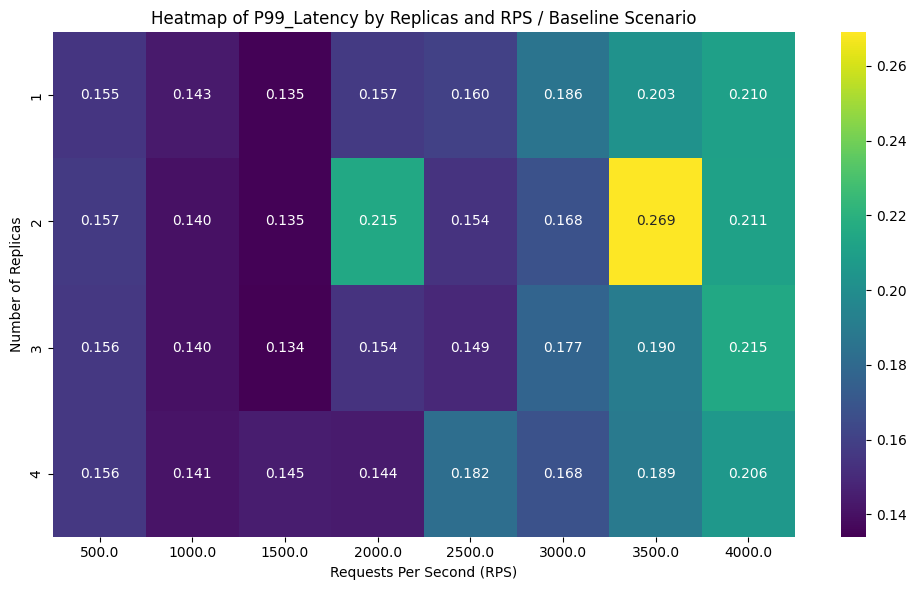

In [8]:
plot_baseline_heatmap(df_baselines, metric="P99_Latency")